# Machine Learning-Based Analysis of Protein Therapies for Down's Syndrome in Mice

# Binary and Multiclass classification


In [1]:
#Importing pandas, numpy, seaborn and matplotlib libraries.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv



# 1. Loading the Dataset

In [2]:
#Reading the data and printing it
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv"
df = pd.read_csv(url)     
display(df)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


The table has 762 rows and 79 columns.

77 columns are Independent dataset.

78th column [Genotype] is Dependent dataset.

79th column [Treatment_Behavior] is Dependent dataset.

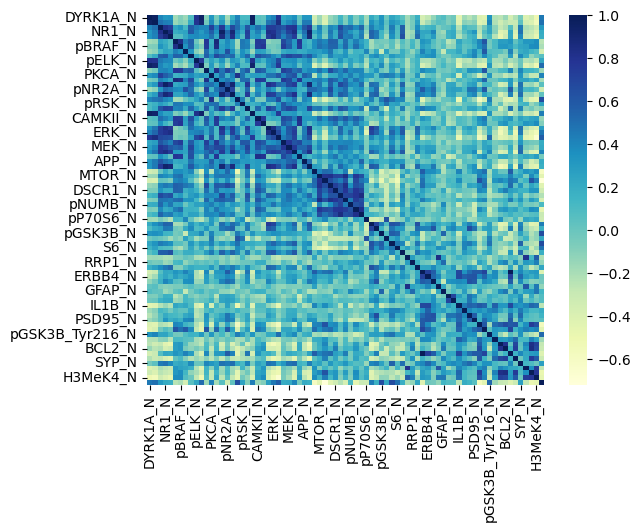

In [3]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Generate the correlation heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu')

# Show the heatmap
plt.show()

The output is a heatmap that shows the correlation coefficients between each pair of variables in the dataset. The diagonal elements will be 1.0 (since each variable is perfectly correlated with itself). The correlation coefficients are represented by a color scale, with blue indicating positive correlation, yellow indicating negative correlation, and white indicating no correlation.


#### Preparing the Data
X = Independent dataset;
Y = Dependent Dataset;
y1 = Binary class dependent dataset;
y2 = Multiclass dependent dataset.

In [4]:
X = df.drop(['Genotype','Treatment_Behavior'],axis=1)
Y = df[['Genotype','Treatment_Behavior']]
y1 = df['Genotype']                           
y2 = df['Treatment_Behavior']                     

In [5]:
print(X.isnull().sum())          # Checking the number of null values in each columns
print(X.isnull().sum().sum())           # Total number of null values 

DYRK1A_N       0
ITSN1_N        0
BDNF_N         0
NR1_N          0
NR2A_N         0
            ... 
SYP_N          0
H3AcK18_N    150
EGR1_N       180
H3MeK4_N     180
CaNA_N         0
Length: 77, dtype: int64
979


# 2.Exploratory data analysis

### 2.a. Useful and Non Useful data 

#### Elimination based on Null values.
This code removes columns from a dependent dataset X that have more than 10 missing values. I use the dropna() method to remove these columns from the original Dataset.

In [6]:
X_new = X.dropna(axis=1,thresh=752)      # Drop columns having more than 10 null values
X_new


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.311337,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.119428,0.441207,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.315762,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.118081,0.444913,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.308615,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.116134,0.422789,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.327140,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.459901,1.543274


#### Here, 8 column have been eliminated because of the presence of more than 10 null values
So, now we are left with 762 rows x 69 columns.

In [7]:
print(X_new.isnull().sum().sum())     #Total number of null values

4


In [8]:
print(df.shape)
print(X.shape)
print(X_new.shape)

(762, 79)
(762, 77)
(762, 69)


#### Eliminating columns based on variance 


Reference: https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f

In [9]:
from sklearn.feature_selection import VarianceThreshold    # Importing the VarianceThreshold class from the sklearn.feature_selection module

threshold = 0.01              
selector = VarianceThreshold(threshold)       # Creating a VarianceThreshold object with a threshold of 0.01.
selected_features = selector.fit_transform(X_new)      # The fit_transform() method of the selector is then called on X_new dataset, which returns a new array with only the selected features.
remaining_cols = X_new.columns[selector.get_support()]
X_new1 = pd.DataFrame(selected_features, columns=remaining_cols) # Creating new dataframe with selected features
print(X_new1) # Print new dataframe

     DYRK1A_N   ITSN1_N     NR1_N    NR2A_N  pCAMKII_N    pELK_N    pERK_N  \
0    0.503644  0.747193  2.816329  5.990152   2.373744  1.750936  0.687906   
1    0.514617  0.689064  2.789514  5.685038   2.292150  1.596377  0.695006   
2    0.509183  0.730247  2.687201  5.622059   2.283337  1.561316  0.677348   
3    0.442107  0.617076  2.466947  4.979503   2.152301  1.595086  0.583277   
4    0.434940  0.617430  2.365785  4.718679   2.134014  1.504230  0.550960   
..        ...       ...       ...       ...        ...       ...       ...   
757  0.394169  0.623696  2.104045  3.314706   3.208804  1.218951  0.467915   
758  0.401739  0.659571  2.183930  3.411782   3.384350  1.250487  0.476240   
759  0.382182  0.586545  2.072000  3.073636   3.006364  1.248727  0.442727   
760  0.365622  0.572209  2.004931  2.783551   2.948221  1.177527  0.432371   
761  0.365605  0.599499  2.062813  2.952577   3.069435  1.220472  0.436471   

       pNR1_N   pNR2A_N   pNR2B_N  ...  pP70S6_N   P70S6_N   pP

With a variance threshold of 0.01, we have 29 columns left. 

### 2.b.Plotting the correlation matrix after elimination based on Null values and Variance.


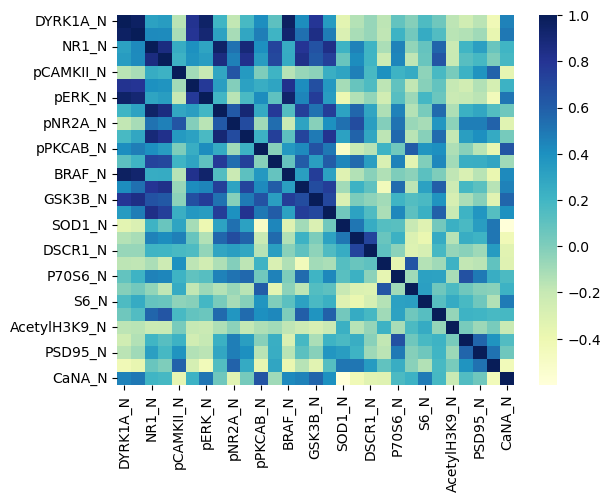

In [10]:
correlation_matrix = X_new1.corr()              # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu')        # Generate the correlation heatmap
plt.show()           

### Elimination based on correlation

The correlation coefficient ranges from -1 to +1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and +1 indicates a perfect positive correlation. A threshold of 0.85 means that any pair of variables with a correlation coefficient greater than or equal to 0.85 will be considered highly correlated and one of them will be removed from the dataset.

Reference: https://h1ros.github.io/posts/drop-highly-correlated-features/


In [11]:
# Elimination of column based on correlation.
corr_threshold = 0.9

columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):      #loops each pairwise combination of columns in the correlation matrix
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= corr_threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X_new1.columns[columns]
selected_columns
X_cleaned = X_new1[selected_columns]
print(X_cleaned)

     DYRK1A_N     NR1_N    NR2A_N  pCAMKII_N    pELK_N   pNR2A_N  pPKCAB_N  \
0    0.503644  2.816329  5.990152   2.373744  1.750936  0.605673  2.308745   
1    0.514617  2.789514  5.685038   2.292150  1.596377  0.587559  2.043037   
2    0.509183  2.687201  5.622059   2.283337  1.561316  0.602449  2.017984   
3    0.442107  2.466947  4.979503   2.152301  1.595086  0.520293  2.132754   
4    0.434940  2.365785  4.718679   2.134014  1.504230  0.507990  2.013697   
..        ...       ...       ...        ...       ...       ...       ...   
757  0.394169  2.104045  3.314706   3.208804  1.218951  0.666857  1.449621   
758  0.401739  2.183930  3.411782   3.384350  1.250487  0.709489  1.489882   
759  0.382182  2.072000  3.073636   3.006364  1.248727  0.657636  1.499091   
760  0.365622  2.004931  2.783551   2.948221  1.177527  0.649172  1.384290   
761  0.365605  2.062813  2.952577   3.069435  1.220472  0.660165  1.414102   

        AKT_N     ERK_N   GSK3B_N  ...  pP70S6_N   P70S6_N   pP

#### Observation: Elimination based on Correlation reduced column to 24 in number.
We are now left with 762 rows x 24 columns

#### Total null values left in the dataset.

In [12]:
print(X_cleaned.isnull().sum().sum())     #Total number of null values in each columns

0


Hence there is no need of imputation, I have checked data cleaning without elimination based on variance, it was only then when some null values remained. 

In [13]:
print(X_cleaned.nunique()) #Checking for unique entries.
print(X_cleaned.info()) 

DYRK1A_N        762
NR1_N           762
NR2A_N          762
pCAMKII_N       762
pELK_N          762
pNR2A_N         762
pPKCAB_N        762
AKT_N           762
ERK_N           762
GSK3B_N         762
TRKA_N          762
SOD1_N          762
pMTOR_N         762
DSCR1_N         762
pP70S6_N        761
P70S6_N         762
pPKCG_N         762
S6_N            762
ADARB1_N        762
AcetylH3K9_N    762
pCASP9_N        762
PSD95_N         762
Ubiquitin_N     762
CaNA_N          762
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DYRK1A_N      762 non-null    float64
 1   NR1_N         762 non-null    float64
 2   NR2A_N        762 non-null    float64
 3   pCAMKII_N     762 non-null    float64
 4   pELK_N        762 non-null    float64
 5   pNR2A_N       762 non-null    float64
 6   pPKCAB_N      762 non-null    float64
 7   AKT_N     

#### OBSERVATION: After Elimination based on Null values, Variance and Correlation we are left with 24 column in total.


### 2.c. Checking Class Balance

In [14]:
print(y1.value_counts())     #number of samples in binary classification
print(y2.value_counts())     #number of samples in Mutliclass classification(Four classes)

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64


There is no significant difference in the number of samples in each class of both binary and multiclass column.

#### Plotting the distribution to visualise the balance between class

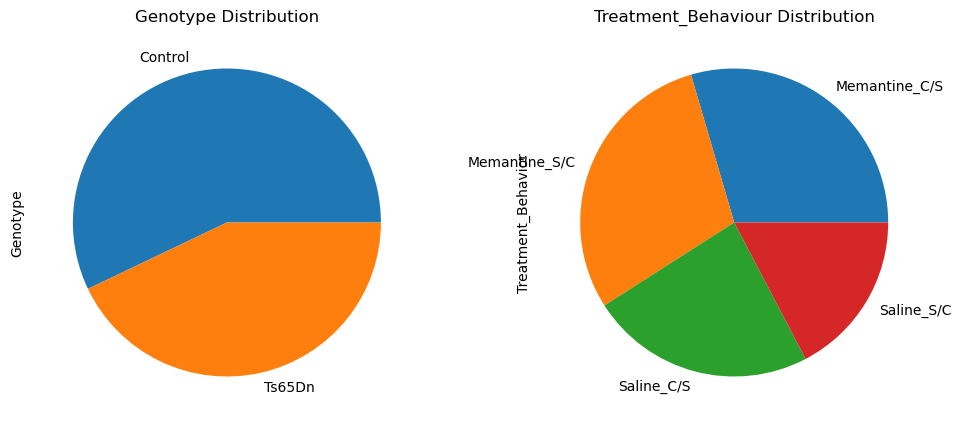

In [15]:
plt.figure(figsize=(12,5))              # Setting the figure size
plt.subplot(1,2,1)                                              
Class_dist = pd.value_counts(df['Genotype'],sort = True)     # Plotting value counts of binary class problem
Class_dist.plot(kind='pie', rot=0)           # plotting pie chart
plt.title("Genotype Distribution")               

plt.subplot(1,2,2)                                 
Class_dist=pd.value_counts(df['Treatment_Behavior'],sort=True)   # Plotting value counts of binary class problem
Class_dist.plot(kind='pie',rot=90,)             # plotting pie chart
plt.title("Treatment_Behaviour Distribution")                   

plt.show()

From the Pie Chart above for binany and multiclass, the distribution visible is fairly equal and hence can be considered as balanced class. 

## 3. Dealing with missing variables: Multivariate feature imputation

Reference: https://scikit-learn.org/stable/modules/impute.html


In [16]:
from sklearn.experimental import enable_iterative_imputer  #loading library for imputations.
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)#imputing missing values using sklearn library
imp.fit(X_cleaned)
X_new2= imp.transform(X_cleaned)#storing imputed dataframe in df_imp
X_new2 = pd.DataFrame(X_new2, columns = X_cleaned.columns)
print(X_new2.isnull().sum().sum()) 


0


#### There are no null values, but still I still ran the imputation for the data set.
We are now left with 762 Rows x 24 Columns with no null values.

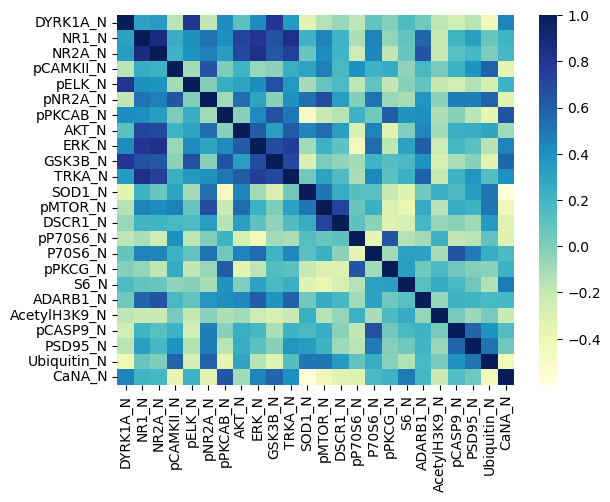

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DYRK1A_N      762 non-null    float64
 1   NR1_N         762 non-null    float64
 2   NR2A_N        762 non-null    float64
 3   pCAMKII_N     762 non-null    float64
 4   pELK_N        762 non-null    float64
 5   pNR2A_N       762 non-null    float64
 6   pPKCAB_N      762 non-null    float64
 7   AKT_N         762 non-null    float64
 8   ERK_N         762 non-null    float64
 9   GSK3B_N       762 non-null    float64
 10  TRKA_N        762 non-null    float64
 11  SOD1_N        762 non-null    float64
 12  pMTOR_N       762 non-null    float64
 13  DSCR1_N       762 non-null    float64
 14  pP70S6_N      762 non-null    float64
 15  P70S6_N       762 non-null    float64
 16  pPKCG_N       762 non-null    float64
 17  S6_N          762 non-null    float64
 18  ADARB1_N      762 non-null    

In [17]:
correlation_matrix = X_new2.corr()             #Correlation matrix after cleaning of dataset
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu')     # Generate the correlation heatmap
plt.show()                                                     
print(X_new2.info())               #Checking the matrix after imputation

<AxesSubplot:>

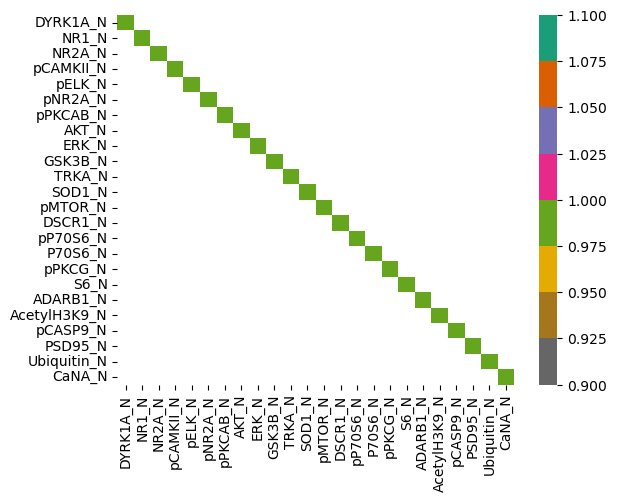

In [18]:
#Identifying left over highly correlated features in a cleaned dataset, checking for correlation over 0.95
corr_cleaned = X_new2.corr().abs()[((X_new2.corr().abs() >= 0.95) | (X_new2.corr().abs() <= -0.95 ))]
sns.heatmap(corr_cleaned, cmap="Dark2_r")

In [19]:
print(X_new2.info()) 
X=X_new2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DYRK1A_N      762 non-null    float64
 1   NR1_N         762 non-null    float64
 2   NR2A_N        762 non-null    float64
 3   pCAMKII_N     762 non-null    float64
 4   pELK_N        762 non-null    float64
 5   pNR2A_N       762 non-null    float64
 6   pPKCAB_N      762 non-null    float64
 7   AKT_N         762 non-null    float64
 8   ERK_N         762 non-null    float64
 9   GSK3B_N       762 non-null    float64
 10  TRKA_N        762 non-null    float64
 11  SOD1_N        762 non-null    float64
 12  pMTOR_N       762 non-null    float64
 13  DSCR1_N       762 non-null    float64
 14  pP70S6_N      762 non-null    float64
 15  P70S6_N       762 non-null    float64
 16  pPKCG_N       762 non-null    float64
 17  S6_N          762 non-null    float64
 18  ADARB1_N      762 non-null    

# 4.  Accuracy, F1 score, balanced accuracy and AUC 

In [20]:
#replacing object type to integer for dependent variables
Y['Genotype'].replace('Control',0,inplace=True)
Y['Genotype'].replace('Ts65Dn',1,inplace=True)
Y['Treatment_Behavior'].replace('Memantine_C/S',0,inplace=True)
Y['Treatment_Behavior'].replace('Memantine_S/C',1,inplace=True)
Y['Treatment_Behavior'].replace('Saline_C/S',2,inplace=True)
Y['Treatment_Behavior'].replace('Saline_S/C',3,inplace=True)
Y

C:\Users\aanki\AppData\Local\Temp\ipykernel_17936\3218202922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Genotype'].replace('Control',0,inplace=True)
C:\Users\aanki\AppData\Local\Temp\ipykernel_17936\3218202922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Genotype'].replace('Ts65Dn',1,inplace=True)
C:\Users\aanki\AppData\Local\Temp\ipykernel_17936\3218202922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Tr

,Genotype,Treatment_Behavior
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
757,1,3
758,1,3
759,1,3
760,1,3


#### Replacing NaN values with the mean of the column

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

print(X.isnull().sum()) # Check for missing values

imputer = SimpleImputer()       # Replace missing values with the mean of the column
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) 
print(np.isinf(X).sum()) # Check for invalid values

X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) # Replace NaN values with the mean of the column

scaler = StandardScaler()   # Standardizing the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

DYRK1A_N        0
NR1_N           0
NR2A_N          0
pCAMKII_N       0
pELK_N          0
pNR2A_N         0
pPKCAB_N        0
AKT_N           0
ERK_N           0
GSK3B_N         0
TRKA_N          0
SOD1_N          0
pMTOR_N         0
DSCR1_N         0
pP70S6_N        0
P70S6_N         0
pPKCG_N         0
S6_N            0
ADARB1_N        0
AcetylH3K9_N    0
pCASP9_N        0
PSD95_N         0
Ubiquitin_N     0
CaNA_N          0
dtype: int64
DYRK1A_N        0
NR1_N           0
NR2A_N          0
pCAMKII_N       0
pELK_N          0
pNR2A_N         0
pPKCAB_N        0
AKT_N           0
ERK_N           0
GSK3B_N         0
TRKA_N          0
SOD1_N          0
pMTOR_N         0
DSCR1_N         0
pP70S6_N        0
P70S6_N         0
pPKCG_N         0
S6_N            0
ADARB1_N        0
AcetylH3K9_N    0
pCASP9_N        0
PSD95_N         0
Ubiquitin_N     0
CaNA_N          0
dtype: int64


### Splitting data to training and test set for both dependent and Independent Variable .

In [22]:
from sklearn.model_selection import train_test_split     #importing library to split dataset to test and train.
X_train,X_test,y1_train,y1_test,y2_train,y2_test = train_test_split(X,df['Genotype'],df['Treatment_Behavior'],test_size=0.4,random_state=10)


### Binary Classification

As there was ValueError in the code snippet below this code which said 'Input contains NaN, infinity or a value too large for dtype('float64').' I used 'SimpleImputer' class from scikit-learn to impute NaN values in my dataset.                         
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')   # Instantiate a SimpleImputer object
X_train = imputer.fit_transform(X_train)       # Fit the imputer to the data and transform the data
X_test = imputer.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)   # Creating a KNeighborsClassifier object with k=5
knn.fit(X_train, y1_train)                  # Fitting the model to the training data
y1_pred = knn.predict(X_test)        # Generate predictions for the test set

# Generate a classification report
print("Accuracy Score: {:.2f}%".format(accuracy_score(y1_test, y1_pred) * 100))
print("Classification Report:\n", classification_report(y1_test, y1_pred))

Accuracy Score: 97.70%
Classification Report:
               precision    recall  f1-score   support

     Control       0.98      0.98      0.98       175
      Ts65Dn       0.98      0.97      0.97       130

    accuracy                           0.98       305
   macro avg       0.98      0.98      0.98       305
weighted avg       0.98      0.98      0.98       305



### Multiclass Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score

# Define and fit the random forest classifier
RandomForestClassifier = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=10, random_state=10)
RandomForestClassifier.fit(X_train, y2_train)

# Make predictions on the test set
y2_pred = RandomForestClassifier.predict(X_test)

# Printing the accuracy score and classification report
print("Accuracy Score: {:.2f}%".format(accuracy_score(y2_test, y2_pred) * 100))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy Score: 94.75%
Classification Report:
                precision    recall  f1-score   support

Memantine_C/S       0.88      0.98      0.93        86
Memantine_S/C       0.99      0.98      0.98       100
   Saline_C/S       0.97      0.86      0.91        77
   Saline_S/C       0.95      0.98      0.96        42

     accuracy                           0.95       305
    macro avg       0.95      0.95      0.95       305
 weighted avg       0.95      0.95      0.95       305



## 5.a. Linear SVM with regularization as hyperparameter

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV          #Importing GridSearchCV

Linear_SVM = svm.SVC(kernel='linear', C=1, random_state=10)

binary_params = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}]  #Checking regularization as hyperparameter using different numbers for both binary and multiclass
multiclass_params = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}]
#Using five fold cross validation with GridsearchCV for hyperparameter tunning for both binary and multiclass.
grid_search_binary = GridSearchCV(estimator=Linear_SVM, param_grid=binary_params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_multiclass = GridSearchCV(estimator=Linear_SVM, param_grid=multiclass_params, scoring='accuracy', cv=5, n_jobs=-1)
#Fitting both binary and multiclass classification for hyperparameter tuning
grid_search_binary.fit(X,y1)
grid_search_multiclass.fit(X,y2)
#Checking Binary and Multiclass Accuracy.
binary_accuracy = grid_search_binary.best_score_
multiclass_accuracy = grid_search_multiclass.best_score_

print(f"Binary SVM Accuracy: {binary_accuracy}")
print(f"Multiclass SVM Accuracy: {multiclass_accuracy}")


Binary SVM Accuracy: 0.5774337805297558
Multiclass SVM Accuracy: 0.7203732370141038


## 5.b.  RBF kernel SVM with kernel width and regularization as hyperparameters

Reference: https://scikit-learn.org/stable/modules/grid_search.html;
           https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/;
           https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

In [27]:
from sklearn.svm import SVC
def SVM_model(X_train, y_train):                  #defining function to find best parameters
    param_grid  =[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']} ,
               {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}]                      # Checking regularization and kernal width as hyperparameter with various values 
     #tuning parameter to find best value
    model_svc = GridSearchCV(SVC(), param_grid , refit = True, verbose = 3, cv=5)
    model_svc.fit(X_train, y_train)
    accuracy=model_svc.best_score_
    best_params=model_svc.best_params_
    return accuracy, best_params

In [28]:
SVM_model(X_train, y1_train)#checking accuracy and best parameters

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.848 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.747 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.901 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.714 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

(0.9912087912087912, {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'})

For Binary classification: With RBF as a kernal, the regularization value of 1000 and kernal width of 0.01 give us the maximum value of accuracy which os 99.12 percentage.

In [29]:
SVM_model(X_train, y2_train)#checking accuracy and best parameters

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.879 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.901 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.912 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

(0.9934304825609173, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'})

For Multiclass classification: With RBF as a kernal, the regularization value of 100 and kernal width of 0.01 give us the maximum value of accuracy which os 99.34 percentage.

## 5.c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay) 

In [30]:
import tensorflow as tf             #Importing tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier  #Importing keras classifier for classification
from keras.models import Sequential            #Importing sequentialto make neural network
from keras.layers import Dense         #Importing dense from keras to make hidden layers

def build_clf(unit):

    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Layer with 128 neurons is added with relu activation
    nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer is sigmoid activated
    nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return nn


Function build_clf defines a neural network classifier where hidden layers is ReLU activation function and output layer is sigmoid activated function for binary classification. It uses the Adam optimizer and binary cross-entropy as the loss function.

In [31]:
def Nural_network (X_train,y_train):

    model=KerasClassifier(build_fn=build_clf)  # Create a KerasClassifier object using the build_clf function.
    params={'batch_size':[100, 20, 50, 25, 32],'nb_epoch':[100, 200, 300, 400],'unit':[5,6, 10, 11, 12, 15],}
    # Define a dictionary of hyperparameters to search over, including batch size, number of epochs, and number of units in the hidden layer
    grid_search=GridSearchCV(estimator=model, param_grid=params, cv=5).fit(X_train,y_train)  # Use GridSearchCV to perform a cross-validated grid search and fitting the data.
    accuracy=grid_search.best_score_   # Extract the best cross-validated accuracy from the grid search object
    best_params=grid_search.best_params_  # Extract the best hyperparameters 
    
    return accuracy, best_params    # Return the best accuracy and hyperparameters 


In [32]:
Nural_network (X_train,y1_train)#checking accuracy and best parameters for binary classification

C:\Users\aanki\AppData\Local\Temp\ipykernel_17936\3075618155.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)  # Create a KerasClassifier object using the build_clf function.


23/23 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.5886


(0.7483277678489685, {'batch_size': 20, 'nb_epoch': 400, 'unit': 11})

This means that the best accuracy achieved by the neural network model with a single ReLU hidden layer and Softmax output on the training data X_train and y1_train was 74.83% batch_size= 20, nb_epoch= 100, and unit= 11 are the best hyperparameters found.

In [33]:
Nural_network (X_train,y2_train)#checking accuracy and best parameters for multiclass classification

C:\Users\aanki\AppData\Local\Temp\ipykernel_17936\3075618155.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)  # Create a KerasClassifier object using the build_clf function.


5/5 [==============================] - 0s 6ms/step - loss: 0.7253 - accuracy: 0.2582


(0.4134257137775421, {'batch_size': 100, 'nb_epoch': 200, 'unit': 10})

This means that the best accuracy achieved by the neural network model with a single ReLU hidden layer and Softmax output on the training data X_train and y1_train was 41.34% batch_size= 100, nb_epoch= 200, and unit= 10 are the best hyperparameters found.

## 5.d. Random forest (max tree depth, max number of variables per node) 

Reference :https://www.coursera.org/lecture/applied-data-science-for-data-analysts/k-fold-cross-validation-with-random-forest-MPvYd

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

In [34]:
from sklearn.ensemble import RandomForestClassifier  #Importing randomforest classifier from sklearn
from sklearn.model_selection import GridSearchCV

def random_forest(X_train,y_train):
    model = RandomForestClassifier()                  
    param = {'max_depth':[0,1,2,5,10,20],     
     'n_estimators':[1,5,10,30,100,200] }          # Providing value of hyperparameters
    model_rfc = GridSearchCV(estimator = model, param_grid= param, cv= 5,n_jobs=-1)  # Using Gridsearch CV for hyperparameter tunning with five fold cross validation
    model_rfc.fit(X_train, y1_train)      # Fitting on RandomForest for hyperparameter tunning
    accuracy=model_rfc.best_score_         
    best_params=model_rfc.best_params_      
    return accuracy, best_params


In [35]:
random_forest(X_train,y1_train)    #checking accuracy and best parameters

C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aanki\anaconda3\lib\site-packag

(0.9585045389393215, {'max_depth': 20, 'n_estimators': 200})

Random forest model is trained with the entropy criterion to measure the quality of splits, and each decision tree in the random forest has a maximum depth of 20. The model contains 200 decision trees, which is specified by the n_estimators hyperparameter. The accuracy of the model on the test set is 95.85 %

In [36]:
random_forest(X_train,y2_train)    #checking accuracy and best parameters

C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aanki\anaconda3\lib\site-packag

(0.9585045389393215, {'max_depth': 10, 'n_estimators': 100})

Random forest model is trained with the entropy criterion to measure the quality of splits, and each decision tree in the random forest has a maximum depth of 10. The model contains 100 decision trees, which is specified by the n_estimators hyperparameter. The accuracy of the model on the test set is 95.85%

# 6. Check feature importance for each model to see if the same proteins are important for each model. 

### 1. Linear SVM with regularization as hyperparameter

In [37]:
from sklearn import svm                    #Importing Support Vector Machine from Sklearn
from sklearn.feature_selection import SelectFromModel
Binary_Classifier = svm.SVC(kernel='linear', C=100)       #Support vector classification with linear kernal
MultiClass_Classifier = svm.SVC(kernel='linear', C=1000)  #Support vector classification model with linear kernal
B_Lin_feature = SelectFromModel(estimator=Binary_Classifier .fit(X,y1),prefit=True)  #For feature extraction fitting the binary dataset 
MC_Lin_feature = SelectFromModel(estimator=MultiClass_Classifier.fit(X,y2),prefit=True)  #For feature extraction fitting the multiclass dataset
Imp_Binary_features = list(np.take(X.columns,np.where(B_Lin_feature.get_support()==True)[0])) #Using get_support to get the important features from binary classification and list is prepared using numpy  

Important_MC_features = list(np.take(X.columns,np.where(MC_Lin_feature.get_support()==True)[0]))  #Using get_support to get the important features from multiclass classification and list is prepared using numpy
Binary_Feature_Indices= B_Lin_feature.get_support(indices=True) #Extracting the indices of important features for binary classification
MC_Feature_Indice= MC_Lin_feature.get_support(indices=True)  #Extracting the indices of important features for multiclass classification
pd.DataFrame({'Important Binary Indices':MC_Feature_Indice,'Important Binary Features':Important_MC_features,
              'Important Multiclass Indices':MC_Feature_Indice,'Important Multiclass Features':Important_MC_features}) #Presenting the data in form of table

,Important Binary Indices,Important Binary Features,Important Multiclass Indices,Important Multiclass Features
0,0,DYRK1A_N,0,DYRK1A_N
1,2,NR2A_N,2,NR2A_N
2,3,pCAMKII_N,3,pCAMKII_N
3,4,pELK_N,4,pELK_N
4,6,pPKCAB_N,6,pPKCAB_N
5,8,ERK_N,8,ERK_N
6,11,SOD1_N,11,SOD1_N
7,17,S6_N,17,S6_N
8,23,CaNA_N,23,CaNA_N


It is observed that 8 important features for both the classification problems are important and same. 

### 2. RBF kernal SVM with kernal width and regularization as hyperparameter

#### For Binary Classification

In [38]:
from sklearn.inspection import permutation_importance

binary_svm = svm.SVC(kernel='rbf').fit(X_train, y1_train) #Fitting binary classification dataset in svm model with rbf kernel
binary_imp = permutation_importance(binary_svm, X_test, y1_test, random_state=10, n_repeats=15) #Applying permutation importance with 15 iterations
binary_imp_features = pd.Series(binary_imp.importances_mean) #Extracting important features and creating a pandas series
top_15_binary = pd.DataFrame({'15 Important Binary Features': binary_imp_features}) #Creating dataframes of most important features
top_15_binary.nlargest(15, '15 Important Binary Features')



,15 Important Binary Features
13,0.082842
10,0.054645
0,0.040000
19,0.039781
16,0.033443
22,0.032787
12,0.029508
17,0.027978
23,0.023607
21,0.019454


#### For Multiclass Classification

In [39]:
multiclass_svm = svm.SVC(kernel='rbf').fit(X_train, y2_train) #Fitting multiclass classification dataset in svm model with rbf kernel
imp_multiclass = permutation_importance(multiclass_svm, X_test, y2_test, random_state=10, n_repeats=15) #Applying permutation importance with 15 iterations on multiclass classification data
multiclass_imp_features = pd.Series(imp_multiclass.importances_mean) #Extracting important features and creating a pandas series
top_5_multiclass = pd.DataFrame({'15 Important Multiclass Features': multiclass_imp_features}) #Creating dataframes of most important features
top_5_multiclass.nlargest(15, '15 Important Multiclass Features')

,15 Important Multiclass Features
6,0.062295
3,0.054426
17,0.044372
18,0.034754
19,0.026448
11,0.024918
22,0.020109
21,0.019891
13,0.019672
0,0.016175


### 3.  Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay)

In [40]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.inspection import permutation_importance

accuracy, best_params = Nural_network(X_train, y1_train) #Called Nural_network function and storing its return values in two variables

# Train the model using the best parameters obtained from GridSearchCV
model = build_clf(best_params['unit'])
model.fit(X_train, y1_train)

# Compute feature importance using permutation importance
imp = permutation_importance(model, X_test, y1_test, random_state=1, n_repeats=2, scoring='accuracy')

# Print the feature importance scores
for i in range(len(imp.importances)):
    print(f"Feature {i}: {imp.importances_mean[i]}")

# Create a pandas series of feature importances
feat_imp = pd.Series(imp.importances_mean, index=X_test.columns)

# Get the top 10 most important features
top_10_features = feat_imp.nlargest(10)
print("Top 10 most important features:")
print(top_10_features)


C:\Users\aanki\AppData\Local\Temp\ipykernel_17936\3075618155.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)  # Create a KerasClassifier object using the build_clf function.


23/23 [==============================] - 1s 3ms/step - loss: 0.6182 - accuracy: 0.6630


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\aanki\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\aanki\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\aanki\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\aanki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\aanki\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\aanki\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\aanki\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\aanki\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\aanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\aanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\aanki\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\aanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\aanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\aanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\aanki\AppData\Local\Temp\ipykernel_17936\2430650421.py", line 7, in <module>
      model.fit(X_train, y1_train)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\aanki\anaconda3\lib\site-packages\keras\losses.py", line 2165, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_3347603]

it is possible that the error is due to running out of memory.

### 4. Random forest (max tree depth, max number of variables per node)

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

model_rfc = RandomForestClassifier(**random_forest(X_train, y1_train)[1])   #the double asterisk ** is used to unpack a dictionary.
model_rfc.fit(X_train, y1_train)
feature_importances = model_rfc.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]  # returns an array of the indices in descending order
# To get the feature importances in descending order, we use the slicing syntax [::-1].
# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(data=X_train, columns=["col"+str(i) for i in range(X_train.shape[1])])


# Create a pandas DataFrame of feature importances
importances_df = pd.DataFrame({'Feature': X_train_df.columns[sorted_idx],'Importance': feature_importances[sorted_idx]})

print(importances_df)


C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aanki\anaconda3\lib\site-packag

   Feature  Importance
0    col19    0.092484
1    col17    0.082678
2     col0    0.082217
3    col16    0.065305
4    col12    0.064408
5    col13    0.042416
6    col23    0.039946
7    col22    0.039630
8    col11    0.038305
9    col21    0.036848
10    col3    0.035364
11    col4    0.034888
12   col18    0.033762
13    col6    0.033201
14   col14    0.032755
15   col10    0.032478
16    col5    0.030332
17    col2    0.029472
18    col1    0.028562
19   col20    0.026940
20    col7    0.026577
21    col9    0.024466
22   col15    0.023505
23    col8    0.023460


In [44]:
model_rfc = RandomForestClassifier(**random_forest(X_train, y2_train)[1])   #the double asterisk ** is used to unpack a dictionary.
model_rfc.fit(X_train, y2_train)
feature_importances = model_rfc.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]  # sort the indices in descending order

# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(data=X_train, columns=["col"+str(i) for i in range(X_train.shape[1])])


# Create a pandas DataFrame of feature importances
importances_df = pd.DataFrame({'Feature': X_train_df.columns[sorted_idx],'Importance': feature_importances[sorted_idx]})

print(importances_df)

C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\aanki\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aanki\anaconda3\lib\site-packag

   Feature  Importance
0    col11    0.151153
1    col23    0.087891
2     col3    0.067368
3    col22    0.067047
4     col6    0.060142
5     col0    0.059120
6    col16    0.051002
7    col17    0.049208
8    col12    0.049169
9    col14    0.043296
10    col4    0.032227
11   col13    0.029450
12   col21    0.028490
13   col20    0.027557
14   col19    0.026827
15    col7    0.024178
16    col5    0.023381
17    col9    0.022652
18   col15    0.021666
19   col18    0.017445
20    col1    0.016610
21    col8    0.015868
22    col2    0.015480
23   col10    0.012773


## 7. See if removing some features systematically will improve your models (e.g. using recursive feature elimination



Reference: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py, 
https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html

### Model training and selection and Plotting number of features VS. cross-validation scores

#### For Binary class

Optimal number of features: 18


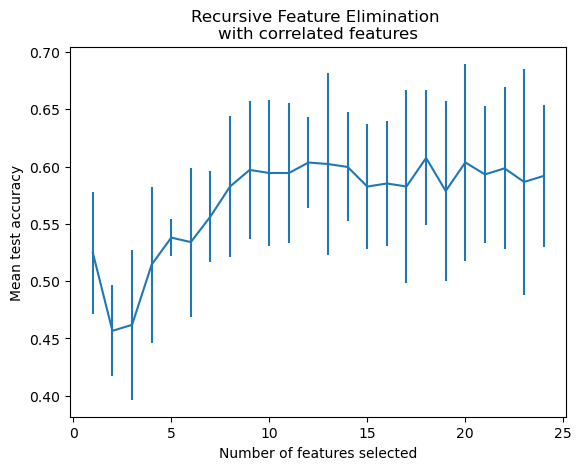

In [45]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Set the minimum number of features to consider
min_features_to_select = 1

# Instantiate the random forest classifier
clf = RandomForestClassifier()

# Instantiate the stratified k-fold cross-validation object
cv = StratifiedKFold(5)

# Instantiate the recursive feature elimination with cross-validation object
rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

# Fit the recursive feature elimination with cross-validation object to the data
rfecv.fit(X, y1)

# Print the optimal number of features selected
print(f"Optimal number of features: {rfecv.n_features_}")

# Plot the mean test accuracy vs. number of features selected
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


With increase in number of features selected there is an initial steep drop in accuracy and then an overall increase in the mean test accuracy. But there are a lot of hills and valley in the accuracy curve which is plotted in the graph above.

#### For multiclass

Optimal number of features: 9


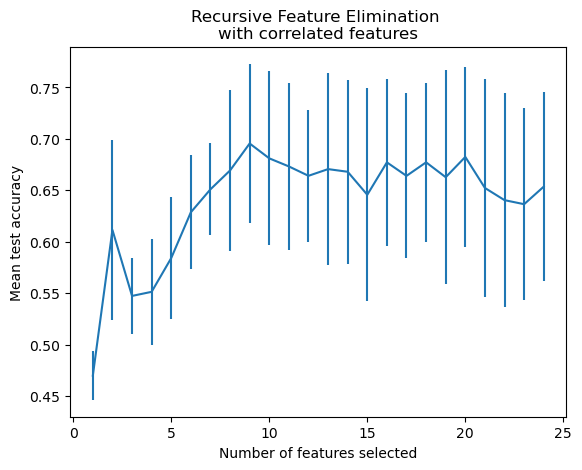

In [46]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Set the minimum number of features to consider
min_features_to_select = 1

# Instantiate the random forest classifier
clf = RandomForestClassifier()

# Instantiate the stratified k-fold cross-validation object
cv = StratifiedKFold(5)

# Instantiate the recursive feature elimination with cross-validation object
rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

# Fit the recursive feature elimination with cross-validation object to the data
rfecv.fit(X, y2)

# Print the optimal number of features selected
print(f"Optimal number of features: {rfecv.n_features_}")

# Plot the mean test accuracy vs. number of features selected
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


With increase in number of features selected there is an overall increase in the mean test accuracy. But there are increase and decrease in the accuracy which is plotted in the graph above.

## 12. LEARNING 

Implemented models for binary and multiclass classification to evaluate the effectiveness of protein types in treating Down's Syndrome in mice.
Conducted thorough data cleaning, handled null values, eliminated irrelevant columns, and prepared the dataset for analysis.
Conducted EDA to gain insights into the dataset, identifying patterns, trends, and potential outliers.
Removed columns based on variance to enhance the quality of the dataset.
Plotted the correlation matrix after elimination based on null values and variance.
Eliminated features based on correlation to avoid multicollinearity.
Evaluated the distribution of classes to ensure a balanced dataset.
Implemented multivariate feature imputation techniques to handle missing variables.
Assessed model performance using accuracy, F1 score, balanced accuracy, and AUC.
Replaced NaN values with the mean of the respective column.

Implemented the following machine learning models:
Linear SVM with regularization as a hyperparameter.
RBF kernel SVM with kernel width and regularization as hyperparameters.
Neural network with a single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay).
Random forest with max tree depth and max number of variables per node.

Checked feature importance for each model to identify crucial proteins.
Evaluated if systematically removing some features improved model performance (i.e., using recursive feature elimination).
Trained multiple models and selected the most effective one based on evaluation metrics.
Plotted the number of features vs. cross-validation scores to visualize model performance.


# References 

All the resources I used to guide myself and write the code were added before each code block. 
 